# Imports

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import glob

# file reading

In [16]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore everything until [result] line
    s = f1.readline()
    while "result" not in s:
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    channels = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    energy1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    ydata1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    yfit1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    bg1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    
    f1.close()

    return energy1, ydata1, yfit1, bg1, channels

In [17]:
dat = {}

for i in ["A", "B", "E", "F", "G", "H", "I"]:
    dat[i] = readDotFit(glob.glob("fits_out_" + i + "/FIT/det_1_0_0.txt_FITDIR/*.fit")[0])

In [23]:
dat["A"][0][-1]

10.559232300468741

# Plotting

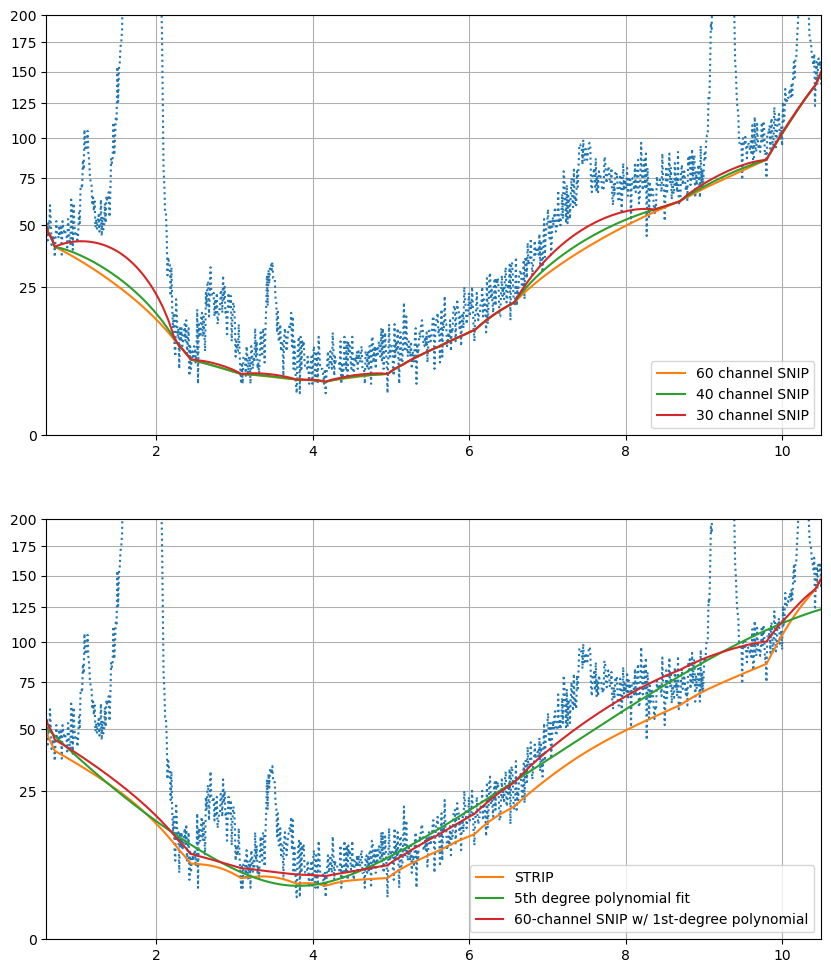

In [46]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

#same raw data in every fit
axs[0].plot(dat["A"][0], dat["A"][1], ":")

axs[0].plot(dat["A"][0], dat["H"][3], label="60 channel SNIP")
axs[0].plot(dat["A"][0], dat["A"][3], label="40 channel SNIP")
axs[0].plot(dat["A"][0], dat["B"][3], label="30 channel SNIP")
axs[0].legend()
axs[0].axis([0.6, 10.5, 0, 200])
axs[0].grid(True)

axs[1].plot(dat["A"][0], dat["A"][1], ":")

axs[1].plot(dat["A"][0], dat["E"][3], label="STRIP")
axs[1].plot(dat["A"][0], dat["F"][3], label="5th degree polynomial fit")
axs[1].plot(dat["A"][0], dat["G"][3], label="60-channel SNIP w/ 1st-degree polynomial")
axs[1].legend()
axs[1].axis([0.6, 10.5, 0, 200])
axs[1].grid(True)

#square root scale
axs[0].set_yscale("function", functions=(np.sqrt, lambda x: x*x))
axs[1].set_yscale("function", functions=(np.sqrt, lambda x: x*x))

plt.show()